In [1]:
#Stock Price Prediction Using Python & Machine learning 

In [10]:
#Import the libraries 
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers import LSTM


In [11]:
#Get the stock quote 
df = web.DataReader('AAPL','yahoo',start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607435
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880666
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426834
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596100
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501358


d

In [4]:
#get the shape of the data
df.shape

(2003, 6)

In [12]:
#visualize the closing price 
df_close=df['Close']
df_close

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 2003, dtype: float64

In [13]:
data = df.filter(['Close'])
dataset = data.values 
dataset

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [14]:
training_data_len = math.ceil(len(dataset)* .8)
train_data1 = dataset[0:training_data_len,0]





In [15]:
train_data1 

array([14.6867857 , 14.76571369, 14.92964268, ..., 47.03749847,
       46.61000061, 47.04499817])

Text(0.5, 1.0, 'Close Price History')

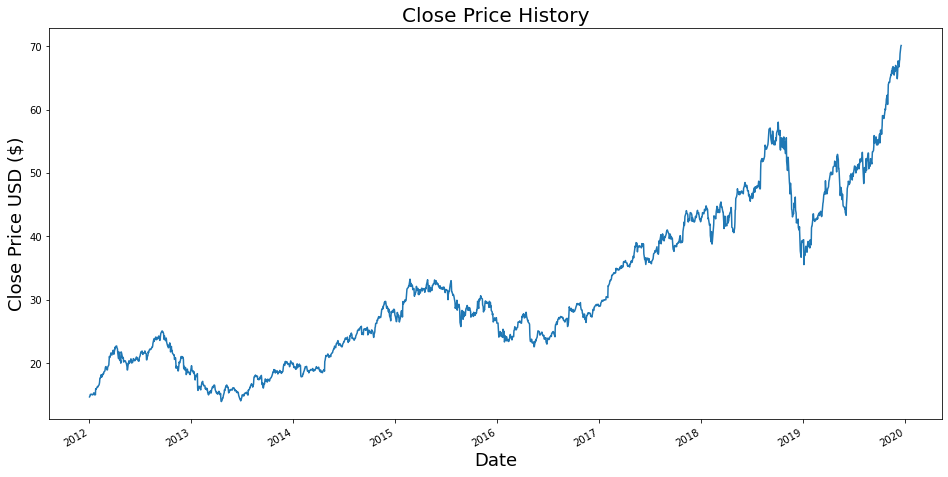

In [16]:
df['Close'].plot(figsize=(16,8))
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.title("Close Price History", fontsize=20)

In [ ]:
#Get the number of rows to train the model on 

In [17]:
data = df.filter(['Close'])
data
dataset = data.values

In [18]:
dataset

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [19]:
training_data_len = math.ceil(len(dataset)* .8)
print(len(dataset))
training_data_len

2003


1603

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data 

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [21]:
#Create the training dataset 
train_data = scaled_data[0:training_data_len,:]
print(train_data)
print(train_data.shape)
#print((train_data == train_data1).all())

[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.58926183]
 [0.58164901]
 [0.58939538]]
(1603, 1)


In [22]:
#Split the data into x_train and y_train data sets 
print(scaled_data[59])
print(scaled_data[60])


[0.14442805]
[0.13949272]


In [23]:
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
 
    if i<=61:
        print(x_train)
        print(y_train)
    

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.018

In [24]:
#convert the x_train and y_train to numpyarray 
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)
x_train.shape

[[0.01316509 0.01457063 0.01748985 ... 0.13766105 0.14243103 0.14442805]
 [0.01457063 0.01748985 0.02026915 ... 0.14243103 0.14442805 0.13949272]
 [0.01748985 0.02026915 0.01984303 ... 0.14442805 0.13949272 0.13293563]
 ...
 [0.52177011 0.51927696 0.51669488 ... 0.5857448  0.59767603 0.5912207 ]
 [0.51927696 0.51669488 0.51322235 ... 0.59767603 0.5912207  0.58926183]
 [0.51669488 0.51322235 0.51958863 ... 0.5912207  0.58926183 0.58164901]]
[0.13949272 0.13293563 0.14507041 ... 0.58926183 0.58164901 0.58939538]


(1543, 60)

In [25]:
#Reshape the data 
#lstm network expects the input to be 3-dimensional in the form of 
# (number of samples, number of time steps, number of features)  
print(x_train)
x_train3d = x_train[:,:,np.newaxis]
print(x_train3d.shape)

[[0.01316509 0.01457063 0.01748985 ... 0.13766105 0.14243103 0.14442805]
 [0.01457063 0.01748985 0.02026915 ... 0.14243103 0.14442805 0.13949272]
 [0.01748985 0.02026915 0.01984303 ... 0.14442805 0.13949272 0.13293563]
 ...
 [0.52177011 0.51927696 0.51669488 ... 0.5857448  0.59767603 0.5912207 ]
 [0.51927696 0.51669488 0.51322235 ... 0.59767603 0.5912207  0.58926183]
 [0.51669488 0.51322235 0.51958863 ... 0.5912207  0.58926183 0.58164901]]
(1543, 60, 1)


In [ ]:
x_train[1542][59]

In [ ]:
from numpy import zeros, newaxis
a = zeros((6, 8))
print(a)
a[0][0]=1
a[0][2]=55
a[0][5]=156
a[0][7]=78
a[0][3]=99
print(a.shape)
print(a)
b = a[:, :, newaxis]
print(b)
print(b.shape)
print(b[1][2][0])

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

newarr = arr.reshape(1, 14)
newarr2 = arr[:,np.newaxis]

print(newarr)
print(newarr.shape)
print(newarr2)
print(newarr2.shape)

In [26]:
#build  the LSTM model 
model = keras.Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (60,1)))
model.add(LSTM(50, return_sequences=False))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')          


2022-09-15 12:42:29.145766: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-15 12:42:29.234706: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 12:42:29.255245: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [31]:
def fit_model(batch_size, epochs):
    model.fit(x_train3d, y_train, batch_size, epochs, verbose=1)

In [28]:
#Create the testing dataset
test_data = scaled_data[training_data_len - 60: ,:]
print(test_data.shape)
#Create the data sets x_train and y_train 
x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
    




(460, 1)


In [29]:
print(x_test)
x_test = np.array(x_test)
print(x_test)
x_test3d = x_test[:,:,np.newaxis]
print(x_test3d.shape)


[array([0.51322235, 0.51958863, 0.53294452, 0.54839284, 0.54581069,
       0.54460864, 0.53071854, 0.53610544, 0.53882114, 0.53815331,
       0.53085209, 0.53935536, 0.55288929, 0.56063573, 0.5528448 ,
       0.5460333 , 0.54696818, 0.54416348, 0.53205414, 0.53178703,
       0.51411273, 0.50333899, 0.4859318 , 0.52079068, 0.50106844,
       0.49278779, 0.49857536, 0.49367817, 0.50129106, 0.51562638,
       0.52092423, 0.50124656, 0.50868133, 0.5229276 , 0.51932152,
       0.52688985, 0.52951649, 0.53436918, 0.54514292, 0.5433621 ,
       0.52092423, 0.48940432, 0.4872674 , 0.47702787, 0.48018873,
       0.48272638, 0.47426767, 0.48735639, 0.50445198, 0.53770815,
       0.53913274, 0.57002938, 0.5759505 , 0.57991274, 0.5857448 ,
       0.59767603, 0.5912207 , 0.58926183, 0.58164901, 0.58939538]), array([0.51958863, 0.53294452, 0.54839284, 0.54581069, 0.54460864,
       0.53071854, 0.53610544, 0.53882114, 0.53815331, 0.53085209,
       0.53935536, 0.55288929, 0.56063573, 0.5528448 , 0.54

In [39]:
y_predicted = model.predict(x_test3d)
y_predicted = scaler.inverse_transform(y_predicted)

In [34]:
def rmse(T,y_predicted):
    rmse = np.sqrt(np.mean(y_predicted - y_test)**2) 
    T.append(rmse)

/tmp/ipykernel_4415/2230093311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['y_predicted']=y_predicted


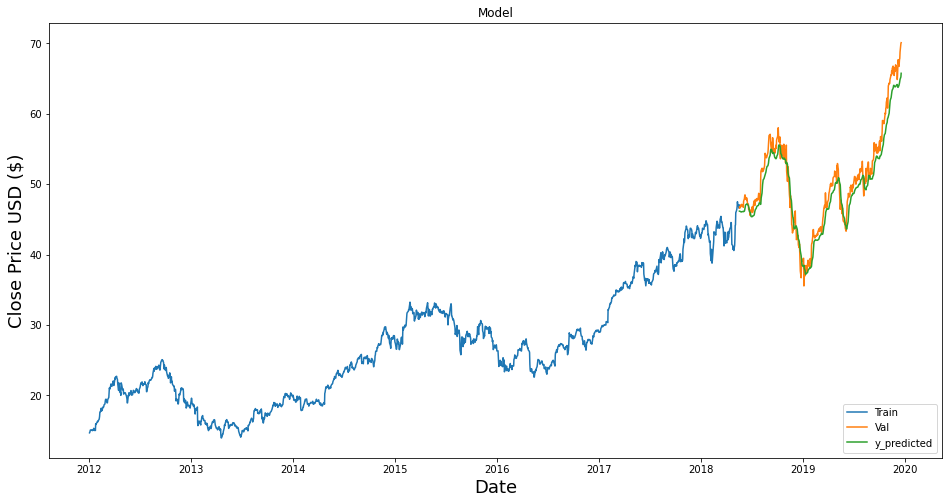

In [45]:
#plot the data 
train = data [:training_data_len]
valid = data[training_data_len:]
valid['y_predicted']=y_predicted
#visualize data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'y_predicted']])
plt.legend(['Train','Val', 'y_predicted'], loc='lower right')
plt.show()


In [67]:
apple_quote = web.DataReader('AAPL', data_source= 'yahoo', start ='2012-01-01', end = '2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60days = new_df[-60:].values
scaled_data60 = scaler.fit_transform(last_60days)
X_test=[]
X_test.append(scaled_data60)
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1 ))
print(X_test.shape)
pred_price = model.predict(X_test)
 
pred_price = scaler.inverse_transform(pred_price)
pred_price




(1, 60, 1)
(1, 60, 1)


array([[68.08293]], dtype=float32)

In [75]:
apple_quote = web.DataReader('AAPL', data_source= 'yahoo', start ='2019-12-18', end = '2019-12-18')
value = apple_quote.filter(['Close'])
value=value.values
value

array([[69.93499756]])

In [8]:
d = pd.DataFrame()
T=['ali', 'nada', 'amine']
for p in T:
    temp = pd.DataFrame(
        {
            'Player': [p],
           
        }
    )

    d = pd.concat([d, temp])
print(d)    

  Player
0    ali
0   nada
0  amine


In [ ]:
#epochs batches comparison 
T=[]
epochs =[1,3,3,1,1,10,50,25]
batches= [1,3,1,3,10,1,10,32,128]
for i in range(0,8):
    fit_model(batches[i], epochs[i])
    y_predicted = model.predict(x_test3d)
    y_predicted = scaler.inverse_transform(y_predicted)
    rmse(T,y_predicted)

print(T)    
    
    
    

1543/1543 [==============================] - 150s 97ms/step - loss: 2.6012e-04
Epoch 1/3
515/515 [==============================] - 88s 141ms/step - loss: 1.3037e-04
Epoch 2/3
515/515 [==============================] - 67s 130ms/step - loss: 1.2323e-04
Epoch 3/3
515/515 [==============================] - 68s 131ms/step - loss: 1.1693e-04
Epoch 1/3
1440/1543 [==========================>...] - ETA: 11s - loss: 1.7490e-04

apple_quote = web.DataReader('AAPL', data_source= 'yahoo', start='2012-12-18', end = '2019-12-18')
